# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests
from bs4 import BeautifulSoup as bs
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
# setting each station name and their url
stations = {}
stations['南港']='https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68#'
url = stations['南港']
response = requests.get(url)
soup = bs(response.text , 'html.parser')
tag = soup.find(class_ = "nav nav-tabs si-tab swiper-wrapper")
for i in tag:
    try:
        stations[i.string] = 'https://www.thsrc.com.tw' + i.get('href')
    except:
        continue
stations

{'南港': 'https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68',
 '台北': 'https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490',
 '板橋': 'https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f',
 '桃園': 'https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
 '新竹': 'https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4',
 '苗栗': 'https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3',
 '台中': 'https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779',
 '彰化': 'https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e',
 '雲林': 'https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f',
 '嘉義': 'https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7',
 '台南': 'https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814',
 '左營': 'https://www.thsrc.com.tw/ArticleCon

In [3]:
# crawler the address of each station
page = {}
for station in stations:
    resp = requests.get(stations[station])
    page[station] = bs(resp.text , 'html.parser')

In [4]:
# crawler the operation hours and ticketing hours of each station
address = []
operation_hours = []
ticketing_hours = []
for station in page:
    p = page[station]
    address.append(p.find(class_ = 'google-map-link orange').text)
    operation_hours.append(p.find_all(class_ = 'gray')[0].string[5:])
    ticketing_hours.append(p.find_all(class_ = 'gray')[1].string[5:])

In [5]:
# create a DataFrame
df = pd.DataFrame({'station' : station , 'address' : address , 'operation_hours' : operation_hours , 'ticketing_hours':ticketing_hours})
df

,station,address,operation_hours,ticketing_hours
0,左營,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,左營,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,左營,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,左營,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,左營,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,左營,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,左營,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,左營,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,左營,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,左營,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [6]:
# crawler GDP
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
response = requests.get(url)
soup = bs(response.text , 'html.parser')
table = soup.find(class_ = 'wikitable sortable static-row-numbers plainrowheaders srn-white-background')

In [7]:
# create GDP DataFrame
GDP_dict = {'Country':[] , 'Region':[] , 'IMF_Estimate':[] , 'IMF_Year':[] , 'United_Nations_Estimate':[] , 'United_Nation_Year':[] , 'World_Bank_Estimated':[] , 'World_Bank_Year':[]}
tr = table.find_all('tr')
for i , t in enumerate(tr[2:52]):
    row = t.text.split('\xa0')[1].split('\n')[:-1]
    for j , key in enumerate(GDP_dict):
        GDP_dict[key].append(row[j])
GDP_df = pd.DataFrame(GDP_dict)
GDP_df

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nation_Year,World_Bank_Estimated,World_Bank_Year
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020
1,China,Asia,"16,642,318",[n 2]2021,"14,342,933",[n 3]2019,"14,722,731",2020
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020


In [8]:
# crawler CPI
url = 'https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
response = requests.get(url)
soup = bs(response.text , 'html.parser')
table = soup.find_all(class_ = 'wikitable')[1]   

In [9]:
# CPI DataFrame
CPI_dict = {'Country':[] , 'CPI_2020':[]}

for i,r in enumerate(table.find_all('tr')[2:102]):
    row = r.text.split('\xa0')
    if '' in row:
        row.remove('')
    row = row[1].split('\n')
    CPI_dict['Country'].append(row[0])
    CPI_dict['CPI_2020'].append(row[1])
CPI_df = pd.DataFrame(CPI_dict)
CPI_df

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [10]:
# merge GDP and CPI DataFrame
merge_df = pd.merge(GDP_df , CPI_df , how = 'outer').dropna()
merge_df.index = list(range(merge_df.shape[0]))
merge_df

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nation_Year,World_Bank_Estimated,World_Bank_Year,CPI_2020
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020,67
1,China,Asia,"16,642,318",[n 2]2021,"14,342,933",[n 3]2019,"14,722,731",2020,42
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020,74
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020,80
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020,77
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020,40
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020,69
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020,53
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020,77
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020,61


Text(0, 0.5, 'World_Bank_Estimated')

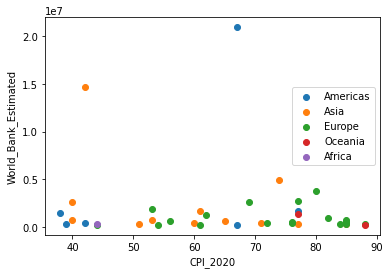

In [41]:
# plot
x = merge_df.CPI_2020
x = pd.Series(x).astype(int)
y = merge_df.World_Bank_Estimated
y1 = [wbe.split(',') for wbe in y]
y2 = []
for wbe in y1:
    s = ''
    for i in wbe:
        s+=i
    y2.append(s)
y = pd.Series(y2).astype(int)
merge_df.Region.unique()
merge_df['x'] = x
merge_df['y'] = y
for region in merge_df.Region.unique():
    df_region = merge_df[merge_df.Region==region]
    plt.scatter(df_region.x , df_region.y)
plt.legend(merge_df.Region.unique() , loc = 'center right')
plt.xlabel('CPI_2020')
plt.ylabel('World_Bank_Estimated')